In deep learning, Cosine Annealing is a learning rate schedule that reduces the learning rate following a cosine curve instead of an exponential or step-wise decay. It is especially useful when you want periodic exploration of new minima without reducing the learning rate too aggressively.

 Why Use Cosine Annealing?

1️⃣ Prevents Premature Convergence

Unlike exponential decay, which continuously shrinks the learning rate, Cosine Annealing brings the learning rate back up at intervals.
This helps escape sharp local minima and find better solutions.

2️⃣ Better for Long Training Runs

Works well in long training runs where models may get stuck in bad minima.

3️⃣ Helps in Noisy Datasets

If your dataset has high variance, this method helps by increasing and decreasing the learning rate in cycles, leading to better generalization.

In [13]:
import torch

import torch.optim as optim

import matplotlib.pyplot as plt

In [14]:
# Dummy model

model = torch.nn.Linear(10,2)

In [15]:
# Optimizer with initial learning rate

optimizer = optim.SGD(model.parameters(), lr=0.1)

In [16]:
# Apply Cosine Annealing with T_max=10 (decay over 10 epochs)

scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10, eta_min=0.01)

In [17]:
# Track learning rates

lrs =[]

Epoch  1: Learning rate :0.097798
Epoch  2: Learning rate :0.091406
Epoch  3: Learning rate :0.081450
Epoch  4: Learning rate :0.068906
Epoch  5: Learning rate :0.055000
Epoch  6: Learning rate :0.041094
Epoch  7: Learning rate :0.028550
Epoch  8: Learning rate :0.018594
Epoch  9: Learning rate :0.012202
Epoch  10: Learning rate :0.010000
Epoch  11: Learning rate :0.012202
Epoch  12: Learning rate :0.018594
Epoch  13: Learning rate :0.028550
Epoch  14: Learning rate :0.041094
Epoch  15: Learning rate :0.055000
Epoch  16: Learning rate :0.068906
Epoch  17: Learning rate :0.081450
Epoch  18: Learning rate :0.091406
Epoch  19: Learning rate :0.097798
Epoch  20: Learning rate :0.100000
Epoch  21: Learning rate :0.097798
Epoch  22: Learning rate :0.091406
Epoch  23: Learning rate :0.081450
Epoch  24: Learning rate :0.068906
Epoch  25: Learning rate :0.055000
Epoch  26: Learning rate :0.041094
Epoch  27: Learning rate :0.028550
Epoch  28: Learning rate :0.018594
Epoch  29: Learning rate :0.0

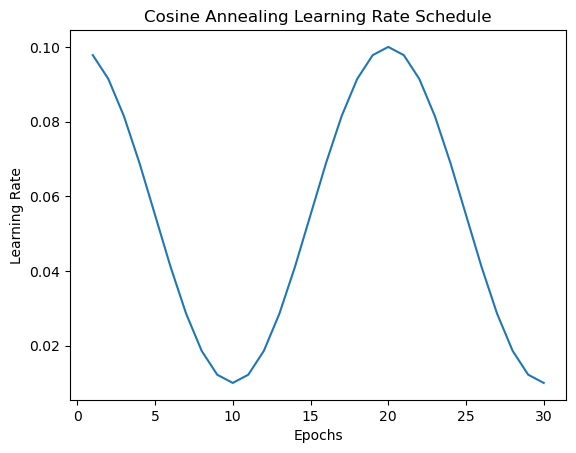

In [18]:
# Simulate training for 30 epochs

for epoch in range(30):

    optimizer.step()  # Perform optimization step

    scheduler.step()  # Apply cosine annealing decay

    lrs.append(scheduler.get_last_lr()[0])

    print(f'Epoch  {epoch + 1}: Learning rate :{scheduler.get_last_lr()[0]:6f}')


# Plot Learning Rate Curve

plt.plot(range(1,31), lrs)

plt.xlabel("Epochs")

plt.ylabel("Learning Rate")

plt.title("Cosine Annealing Learning Rate Schedule")

plt.show()

PyTorch also provides CosineAnnealingWarmRestarts, which resets the learning rate periodically:

In [ ]:
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)


T_0 = 10 → Restart after 10 epochs.
T_mult = 2 → Each cycle duration doubles.

✅ Use Case: Helps when models need periodic bursts of exploration.